## Other Ensemble Methods (AdaBoost)

While Random Forests are an example of an ensemble method, there are many other ensemble methods used in machine learning. Boosting is another powerful type of ensemble method that builds models sequentially. Each new model is trained to correct the errors made by the previous ones. This process focuses on the "hard-to-predict" cases, often leading to models with very high accuracy.

AdaBoost (Adaptive Boosting) was the first successful boosting algorithm. It works by adjusting the weights of the data points at each iteration. Misclassified points are given higher weights, forcing the next model in the sequence to focus more on them.

<img src="adaboost1.png" width="700"/>

In this project, we will apply the AdaBoost algorithm to our `all_seasons.csv` dataset, tackling two different tasks to see its versatility.

1.  Classification: We will predict whether a player is a "High-Usage" player.
2.  Regression: We will predict a player's assists per game (`ast`).

We will use the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

Start by importing them, then loading our dataset.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

df = pd.read_csv('all_seasons.csv')

Let's format and clean up the dataset:

In [49]:
df.columns = [col.strip().lower() for col in df.columns]
df = df.drop(columns=['unnamed: 0'], errors='ignore')
df = df.dropna(subset=['pts', 'ast', 'reb', 'net_rating', 'usg_pct']).copy()

### Part 1: Usage Rate

We define "high usage" to be at or above the 75th percentile in usage rate.

In [50]:
usage_threshold = df['usg_pct'].quantile(0.75)
df['high_usage'] = (df['usg_pct'] >= usage_threshold).astype(int)
df = df.fillna(0)

Then we define our variables:

In [51]:
features_cls = ['age', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'ts_pct']
X_cls = df[features_cls]
y_cls = df['high_usage']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

Now we run the model:

In [52]:
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train_cls, y_train_cls)

y_pred_ada_cls = ada_classifier.predict(X_test_cls)

print(f"\nAdaBoost Classifier Accuracy: {accuracy_score(y_test_cls, y_pred_ada_cls):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_ada_cls))

/Users/ethanma/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier Accuracy: 0.8739

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1922
           1       0.85      0.60      0.71       647

    accuracy                           0.87      2569
   macro avg       0.87      0.78      0.81      2569
weighted avg       0.87      0.87      0.87      2569



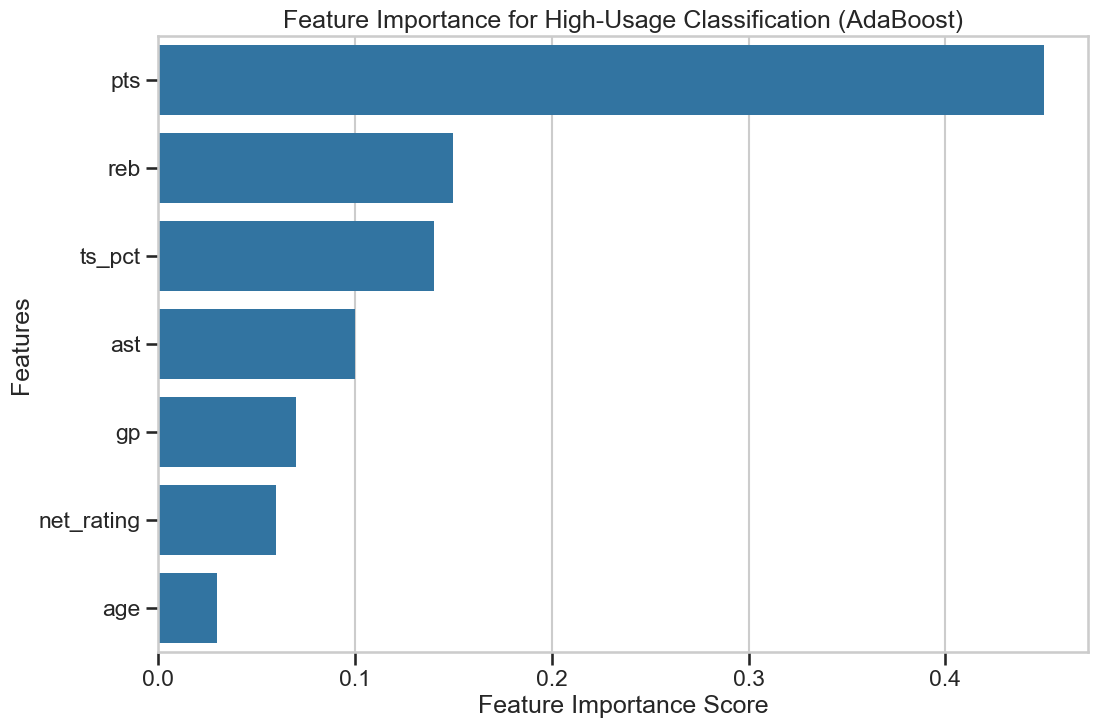

In [53]:
importances_ada_cls = ada_classifier.feature_importances_
feature_imp_ada_cls = pd.Series(importances_ada_cls, index=features_cls).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp_ada_cls, y=feature_imp_ada_cls.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance for High-Usage Classification (AdaBoost)")
plt.show()

This model has a slightly higher accuracy level when compared to the Random Forest model, suggesting that AdaBoost is a better ensemble method for this particular dataset. We overall find similar results to the Random Forest, with good accuracy predicting usage rate.

## Part 2: Assists

First we define our variables.

In [54]:
features_reg = ['age', 'gp', 'pts', 'reb', 'net_rating', 'usg_pct', 'ts_pct']
X_reg = df[features_reg]
y_reg = df['ast']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

Then, run the model:

In [55]:
ada_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_regressor.fit(X_train_reg, y_train_reg)

y_pred_ada_reg = ada_regressor.predict(X_test_reg)

print(f"\nAdaBoost Regressor R-squared (R2): {r2_score(y_test_reg, y_pred_ada_reg):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_ada_reg):.4f}")


AdaBoost Regressor R-squared (R2): 0.3640
Mean Absolute Error (MAE): 1.0656


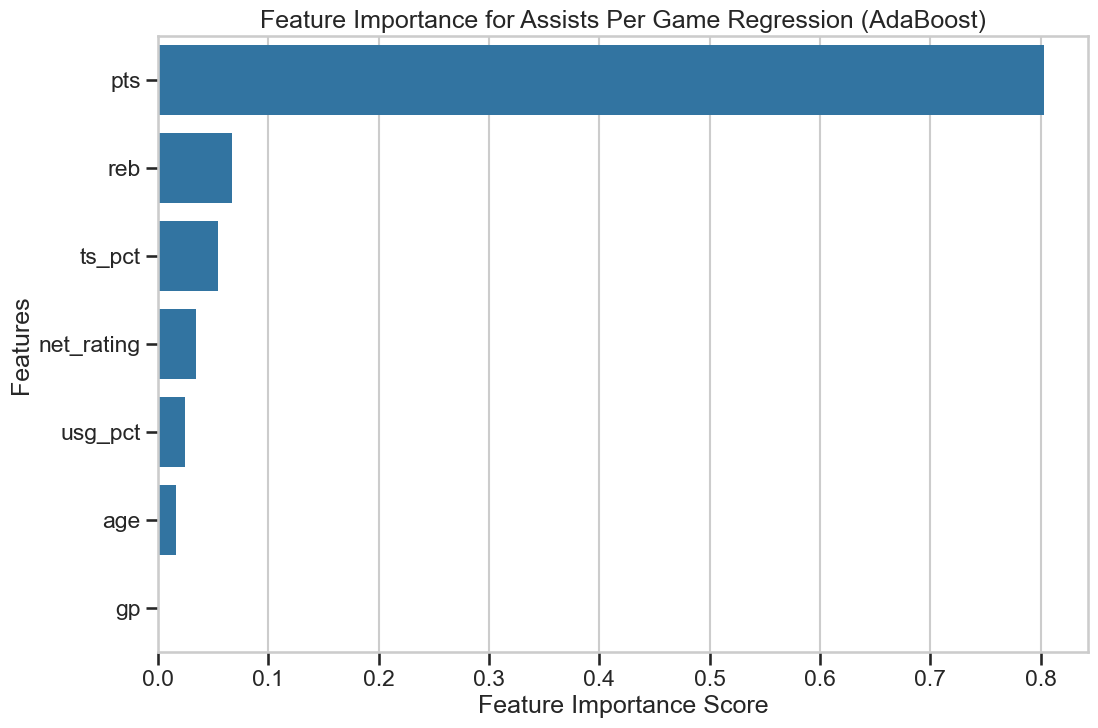

In [56]:
importances_ada_reg = ada_regressor.feature_importances_
feature_imp_ada_reg = pd.Series(importances_ada_reg, index=features_reg).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp_ada_reg, y=feature_imp_ada_reg.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance for Assists Per Game Regression (AdaBoost)")
plt.show()

While the usage rate predictions from this model were slightly better and more accurate, we find the opposite for assists per game, as this model has a much lower R squared compared to the Random Forests model. This is most likely because the Random Forest's averaging approach is better at handling the specific noise and outliers present in the dataset for predicting assists. AdaBoost's focus on correcting errors may have caused it to over-index on a few difficult-to-predict players, leading to a slightly lower R-squared score on the test set.

All in all, this comparison has allowed us to see the different strengths and weaknesses between these two examples of ensemble methods.